<a href="https://colab.research.google.com/github/Charishma1389/-Medical-Insurance-Cost-Price-Prediction/blob/main/medical_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
medical_dataset = pd.read_csv('/content/Medicalpremium.csv')

In [6]:
medical_dataset.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [7]:
medical_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [8]:
medical_dataset.shape

(986, 11)

In [9]:
medical_dataset.isnull().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


In [10]:
medical_dataset.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


<Figure size 600x600 with 0 Axes>

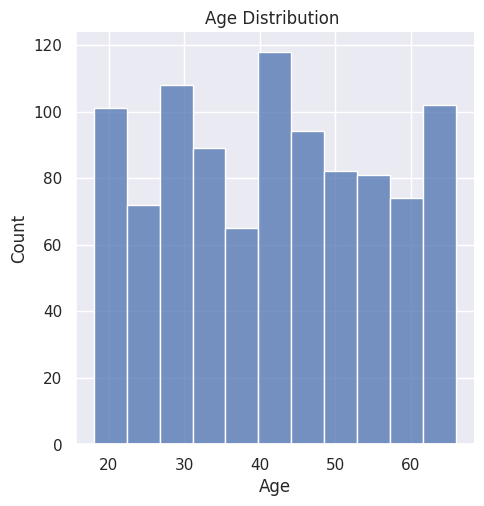

In [12]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(medical_dataset['Age'])
plt.title('Age Distribution ')
plt.show()

In [13]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=medical_dataset)
plt.title('Sex')
plt.show()

ValueError: Could not interpret value `sex` for `x`. An entry with this name does not appear in `data`.

<Figure size 600x600 with 0 Axes>

In [ ]:
medical_dataset['sex'].value_counts()

,count
sex,
male,676
female,662


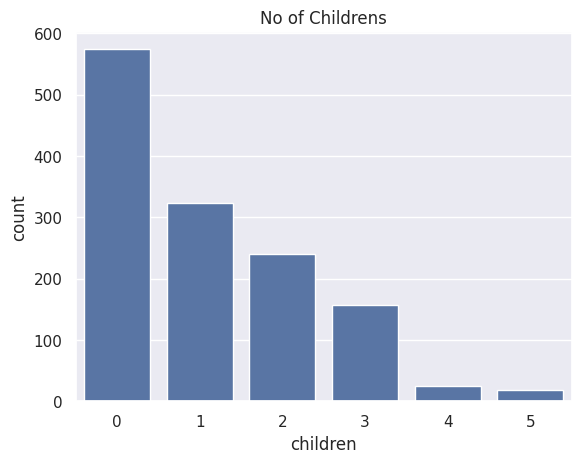

In [ ]:
sns.set()
sns.countplot(x='children',data=medical_dataset)
plt.title('No of Childrens')
plt.show()

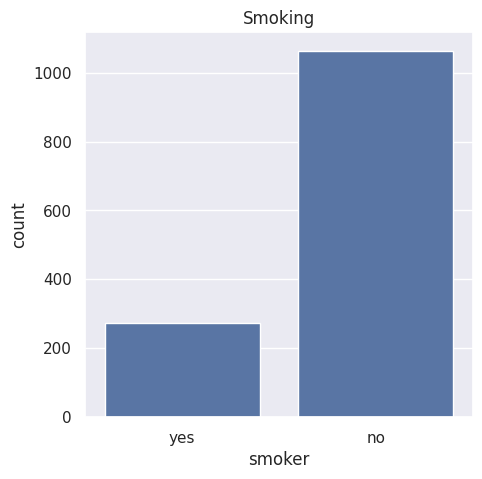

In [ ]:
sns.set()
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=medical_dataset)
plt.title('Smoking')
plt.show()

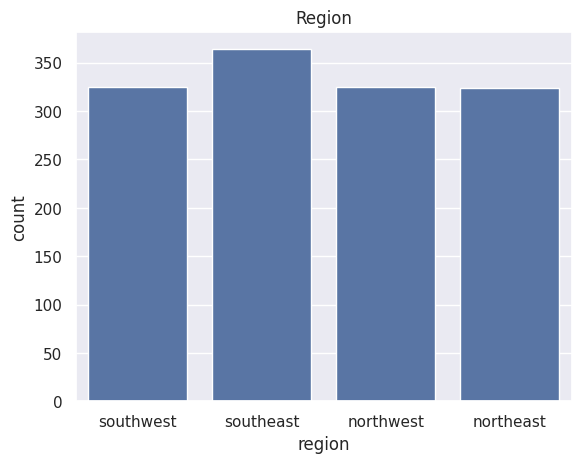

In [ ]:
sns.set()
sns.countplot(x='region',data=medical_dataset)
plt.title('Region')
plt.show()

In [ ]:
medical_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [ ]:
#encoding the sex columns
medical_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

# smoker columsn

medical_dataset.replace({'smoker':{'yes':0,'no': 1}},inplace=True)

# for the region column

medical_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [ ]:
X = medical_dataset.drop(columns='charges',axis=1)
Y  = medical_dataset['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:
print(Y)


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
training_data_prediction = regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print(r2_train)

0.751505643411174


In [ ]:
# prediciting the test data
test_data_predicition = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test,test_data_predicition)

In [ ]:
print(r2_test)

0.7447273869684076


In [ ]:
input_data = (37,1,30.8,2,1,0)

#chaning it to numpy array
input_data_as_array = np.asarray(input_data)

#reshapping the data
input_data_reshaped = input_data_as_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print("The person will get insurance money = ",prediction[0])




The person will get insurance money =  8102.1307143085905


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
